In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [90]:
dataset = pd.read_csv('Dataset-for-498-V4.csv')


In [91]:
dataset = dataset[['Duration','Operational Cost', 'Total Fund', 'Revenue', 'Profit','Net Profit Margin', 'Valuation','Userbase','Daily Active User']]


In [92]:
dataset = dataset.dropna()

In [93]:
def removePercentage(value):
    decimal_value=value[:-1]
    decimal_value=(int(decimal_value)/100)
    return decimal_value

In [94]:
dataset['Net Profit Margin'] = dataset['Net Profit Margin'].apply(lambda x: removePercentage(x))
dataset.head()

,Duration,Operational Cost,Total Fund,Revenue,Profit,Net Profit Margin,Valuation,Userbase,Daily Active User
0,0.0,120000,1000000,520000,400000,0.77,1400000,200000,46000.0
1,0.5,120000,1000000,520000,400000,0.77,1400000,200000,46000.0
2,1.0,120000,1000000,520000,400000,0.77,1400000,200000,46000.0
3,1.5,220000,1000000,520000,300000,0.58,1300000,200000,46000.0
4,2.0,220000,1000000,520000,300000,0.58,1300000,200000,46000.0


In [95]:
X = dataset.drop('Valuation', axis=1)
y = dataset['Valuation']

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


Mean Squared Error (MSE): 0.0025110481745965864
R-squared (R2): 0.997260111630331
Accuracy: 99.73%


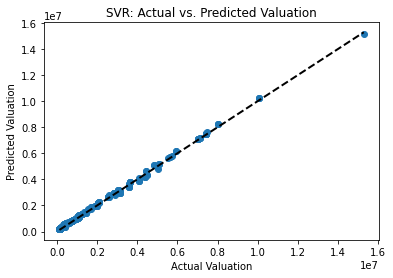

In [98]:

# Model training
model = SVR(kernel='linear')
model.fit(X_train, y_train.ravel())

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

y_pred_reshaped = y_pred.reshape(-1, 1)

# Rescale predictions for accuracy calculation
y_pred_rescaled = scaler.inverse_transform(y_pred_reshaped)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculate accuracy
accuracy = r2 * 100

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Accuracy: {:.2f}%".format(accuracy))

# Plotting the results
plt.scatter(y_test_rescaled, y_pred_rescaled)
plt.plot([min(y_test_rescaled), max(y_test_rescaled)], [min(y_test_rescaled), max(y_test_rescaled)], 'k--', lw=2)
plt.xlabel('Actual Valuation')
plt.ylabel('Predicted Valuation')
plt.title('SVR: Actual vs. Predicted Valuation')
plt.show()

In [99]:
# Test the model
new_data = pd.DataFrame([[10, 1300000, 600, 1220, -80000, -0.07,700000,1610000]],
                        columns=['Duration', 'Operational Cost', 'Total Fund', 'Revenue', 'Profit', 'Net Profit Margin','Userbase','Daily Active User'])

# Preprocess the new data
new_data_scaled = new_data.copy()
for feature in new_data.columns:
    new_data_scaled[feature] = scaler.transform(new_data[[feature]])

# Make predictions
new_data_pred = model.predict(new_data_scaled)

# Rescale the predictions
new_data_pred_rescaled = scaler.inverse_transform(new_data_pred.reshape(-1, 1))

print("Predicted Valuation:", new_data_pred_rescaled)




Predicted Valuation: [[177715.61714228]]


c:\Users\farha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\farha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\farha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\farha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\farha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\farha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn